# Project: Wrangling and Analyzing Data

In [1]:
# Importing libraries
import json
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
from scipy import stats
import tweepy
from tweepy import OAuthHandler 
import json
from timeit import default_timer as timer
from collections import Counter
import seaborn as sns


## Gathering Data

### Twitter Archive (Local File)

In [2]:
# Reading tweets with extra info parsed from text
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Image Predictions (URL)

In [3]:
# Reading dataframe from TSV
df_image_predictions = pd.read_csv('image-predictions-3.tsv',delimiter='\t')

### Twitter API

In [4]:
# Twitter API for more data (save to local file)
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

## DO NOT RUN CODE

# Storing data on tweet-json.txt
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()
end = timer()


with open('tweet-json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet_json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            passend = timer()
            print(end - start)
            print(fails_dict)


In [5]:
# Saving tweet elements 
tweet_elements = ['id', 'favorite_count', 'retweet_count']
# For converting list to dataframe
data = []

with open('tweet-json.txt', 'r') as readfile: 
    # Reading in JSON line and converting to dict
    tweet_json = readfile.readline()
    
    # Reading line by line 
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a smaller dict
        data_row = dict((k, tweet_dict[k]) for k in tweet_elements)
        data.append(data_row)
        
        # Reading in JSON line and converting to dict
        tweet_json = readfile.readline()
        
            
    
df_tweet_info = pd.DataFrame.from_dict(data)

## Assessing Data

### Visual assessment

In [6]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:

df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:

df_tweet_info

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


### Programmatic assessment

In [9]:
#Checking summary info and descriptive statistics
df_twitter_archive.info()
df_twitter_archive.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#Checking for missing values (NaN)
df_twitter_archive[df_twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [11]:
#Checking for unique values.
df_twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
Sadie           8
the             8
an              7
Buddy           7
Bailey          7
Toby            7
Daisy           7
Scout           6
Oscar           6
Bella           6
Jax             6
Jack            6
Rusty           6
Dave            6
Milo            6
Stanley         6
Leo             6
Koda            6
George          5
             ... 
Carper          1
Lucky           1
Ralphé          1
Arlen           1
Crimson         1
Cheesy          1
Godzilla        1
Mimosa          1
O               1
incredibly      1
Mya             1
Tilly           1
Zooey           1
Eriq            1
Pepper          1
Timofy          1
Trip            1
Pawnd           1
Huck            1
Ivar            1
Caryl           1
Sunshine        1
Rolf            1
Geno            1
Eazy      

In [12]:
#Checking summary info and descriptive statistics
df_image_predictions.info()
df_image_predictions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
#Checking for unique values
df_image_predictions.p1.value_counts()
df_image_predictions.p2.value_counts()
df_image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [13]:
# Checking summary info and descriptive statistics
df_tweet_info.info()
df_tweet_info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


,favorite_count,id,retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


#### Quality issues

df_twitter_archive **table:**

>* Need to fix inconsistency in column called name since name is not an actual name sometimes

>* tweet_id column needs to be converted from a number to string value

>* Date and Time columns need to be converted to datetime objects

>* Rating columns need to be converted to float values

df_image_predictions **table:**

>* Some inconsistencies found for p1, p2, p3 because the first letter is somtimes capitalized.  

>* Removing the (_) between the words

df_tweet_info **table:**



>* Need to convert id column from a number to a string


#### Tidiness issues

df_twitter_archive **table:**

>* Need to Parse the datetime information into seperate columns

>* Need to drop columns that are not needed & rearrange column order for an easier read

>* Need to combine each dog stage column into a single column named "stage"

>* Need to exclude columns not needed for the analysis

>* Need to exclude retweeted_status_id records from dataset



df_tweet_info **table:**


>* The id column needs to be renamed to "tweet_id" to match the other 2 tables




All Tables:

>* Need to perform an inner join between all three datasets


## Cleaning Data

In [14]:
# Making copies of dataframes to clean 
df_clean_twitter_archive = df_twitter_archive.copy()
df_clean_image_predictions = df_image_predictions.copy()
df_clean_tweet_info = df_tweet_info.copy()

### **df_clean_twitter_archive Table**

**Define**

>* Replace incorrect name since name is not an actual name sometimes (df_twitter_archive table)


**Code**

In [15]:
# Replacing incorrect names with None value or corrected Name
df_clean_twitter_archive['name'].replace('the', 'None', inplace=True)
df_clean_twitter_archive['name'].replace("light",'None', inplace=True)
df_clean_twitter_archive['name'].replace("life",'None', inplace=True)
df_clean_twitter_archive['name'].replace("an",'None', inplace=True)
df_clean_twitter_archive['name'].replace("a",'None', inplace=True)
df_clean_twitter_archive['name'].replace("by",'None', inplace=True)
df_clean_twitter_archive['name'].replace("actually",'None', inplace=True)
df_clean_twitter_archive['name'].replace("just",'None', inplace=True)
df_clean_twitter_archive['name'].replace("getting",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("infuriating",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("old",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("all",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("this",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("very",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("mad",'None', inplace=True) 
df_clean_twitter_archive['name'].replace("not",'None', inplace=True)
df_clean_twitter_archive['name'].replace("one",'None', inplace=True)
df_clean_twitter_archive['name'].replace("my",'None', inplace=True)
df_clean_twitter_archive['name'].replace("O","O'Malley", inplace=True)
df_clean_twitter_archive['name'].replace("quite","None", inplace=True)
df_clean_twitter_archive['name'].replace("such","None", inplace=True)

**Test**

In [16]:
df_clean_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**Define**

>* Exclude tweets that have a retweeted_status 

**Code**

In [18]:
# removing values using the drop() function
df_clean_twitter_archive.drop(df_clean_twitter_archive[df_clean_twitter_archive['retweeted_status_id'].notnull()== True].index,inplace=True)

**Test**

In [19]:
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

**Define**

>* Convert the timestamp column from a string to DateTime objects

**Code**

In [20]:
# Converting the column from strings to DateTime objects using pd.to_datetime .
df_clean_twitter_archive['timestamp'] = pd.to_datetime(df_clean_twitter_archive['timestamp'])

df_clean_twitter_archive['date'] = df_clean_twitter_archive['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean_twitter_archive['time'] = df_clean_twitter_archive['timestamp'].apply(lambda time: time.strftime('%H:%M'))

**Test**

In [21]:
df_clean_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00


**Define**

>* Combine each dog stage column into a single column named "stage"

**Code**

In [22]:
df_clean_twitter_archive['stage'] = df_twitter_archive[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

df_clean_twitter_archive['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_clean_twitter_archive['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_clean_twitter_archive['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_clean_twitter_archive['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_clean_twitter_archive['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

**Test**

In [23]:
df_clean_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,07-29-2017,00:08,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,07-28-2017,16:27,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,07-28-2017,00:22,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,07-27-2017,16:25,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,07-26-2017,15:59,doggo


**Define**

>* Remove unneccessary columns from the df_clean_twitter_archive table and reorder the columns for simplicity.

**Code**

In [24]:
# Removing unnecessary columns 
df_clean_twitter_archive.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo'], axis=1,inplace=True)

In [25]:
# Reordering the columns for simplicity
column_titles = ['tweet_id', 
                'date', 
                'time',
                'name',
                'stage',
                'rating_numerator',
                'rating_denominator']
df_clean_twitter_archive = df_clean_twitter_archive.reindex(columns=column_titles)

**Test**

In [26]:
df_clean_twitter_archive.head()

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator
0,892420643555336193,08-01-2017,16:23,Phineas,None,13,10
1,892177421306343426,08-01-2017,00:17,Tilly,None,13,10
2,891815181378084864,07-31-2017,00:18,Archie,None,12,10
3,891689557279858688,07-30-2017,15:58,Darla,None,13,10
4,891327558926688256,07-29-2017,16:00,Franklin,None,12,10


**Define**

>* Change datatype for tweet_id column to string

**Code**

In [27]:
df_clean_twitter_archive.tweet_id = df_clean_twitter_archive.tweet_id.astype(str)

**Test**

In [28]:
type(df_clean_twitter_archive['tweet_id'].iloc[0])

str

**Define**

>* Convert Date and Time columns to datetime objects


**Code**

In [29]:
df_clean_twitter_archive['date'] = pd.to_datetime(df_clean_twitter_archive['date'])
df_clean_twitter_archive['time'] = pd.to_datetime(df_clean_twitter_archive['time'])

**Test**

In [30]:
type(df_clean_twitter_archive['date'].iloc[0])
type(df_clean_twitter_archive['time'].iloc[0])

pandas._libs.tslib.Timestamp

**Define**

>* Convert rating_numerator and rating_denominator field to float

**Code**

In [31]:
df_clean_twitter_archive['rating_numerator'] = df_clean_twitter_archive['rating_numerator'].astype(float)
df_clean_twitter_archive['rating_denominator'] = df_clean_twitter_archive['rating_denominator'].astype(float)

**Test**

In [32]:
type(df_clean_twitter_archive['rating_numerator'].iloc[0])


numpy.float64

### df_tweet_info table

**Define**

>* Rename the "id" column to "tweet_id" to match the other 2 datasets

**Code**

In [33]:
df_clean_tweet_info.rename(columns={'id': 'tweet_id'}, inplace=True)


**Test**

In [34]:
df_clean_tweet_info.columns

Index(['favorite_count', 'tweet_id', 'retweet_count'], dtype='object')

**Define**

>* Convert tweet_id column to string 

**Code**

In [35]:
df_clean_tweet_info.tweet_id = df_clean_tweet_info.tweet_id.astype(str)

**Test**

In [36]:
type(df_clean_tweet_info['tweet_id'].iloc[0])

str

### df_image_predictions table

**Define**

>* Replace the underscore in the p1,p2,p3 columns

**Code**

In [37]:
df_clean_image_predictions['p1'] = df_clean_image_predictions['p1'].str.replace('_', ' ')
df_clean_image_predictions['p2'] = df_clean_image_predictions['p2'].str.replace('_', ' ')
df_clean_image_predictions['p3'] = df_clean_image_predictions['p3'].str.replace('_', ' ')

**Test**

In [38]:
df_clean_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Define**

>* Make the text consistent 

**Code**

In [39]:
df_clean_image_predictions['p1'] = df_clean_image_predictions['p1'].str.title()
df_clean_image_predictions['p2'] = df_clean_image_predictions['p2'].str.title()
df_clean_image_predictions['p3'] = df_clean_image_predictions['p3'].str.title()

**Test**

In [40]:
df_clean_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Define**

>* Convert "tweet_id" column to string datatype

**Code**

In [41]:
df_clean_image_predictions.tweet_id = df_clean_image_predictions.tweet_id.astype(str)

**Test**

In [42]:
type(df_clean_image_predictions['tweet_id'].iloc[0])

str

**Define**

>* Join the tables into a single table

**Code**

In [43]:
df_merge = pd.merge(df_clean_twitter_archive, df_clean_tweet_info,on='tweet_id', how='inner')

In [44]:
df_merge = pd.merge(df_merge, df_clean_image_predictions,on='tweet_id', how='inner')

**Test**

In [45]:
df_merge

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01,2019-02-09 16:23:00,Phineas,None,13.0,10.0,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01,2019-02-09 00:17:00,Tilly,None,13.0,10.0,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31,2019-02-09 00:18:00,Archie,None,12.0,10.0,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30,2019-02-09 15:58:00,Darla,None,13.0,10.0,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29,2019-02-09 16:00:00,Franklin,None,12.0,10.0,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
5,891087950875897856,2017-07-29,2019-02-09 00:08:00,None,None,13.0,10.0,20562,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
6,890971913173991426,2017-07-28,2019-02-09 16:27:00,Jax,None,13.0,10.0,12041,2158,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False
7,890729181411237888,2017-07-28,2019-02-09 00:22:00,None,None,13.0,10.0,56848,16716,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27,2019-02-09 16:25:00,Zoey,None,13.0,10.0,28226,4429,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
9,890240255349198849,2017-07-26,2019-02-09 15:59:00,Cassie,doggo,14.0,10.0,32467,7711,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


**Define**

>* df_merge table: Reorder the Date (month-day-year) and drop the date info from the Time column.

**Code**

In [46]:
df_merge['date'] = df_merge['date'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_merge['time'] = df_merge['time'].apply(lambda time: time.strftime('%H:%M'))

**Test**

In [47]:
df_merge

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,08-01-2017,16:23,Phineas,None,13.0,10.0,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,08-01-2017,00:17,Tilly,None,13.0,10.0,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,07-31-2017,00:18,Archie,None,12.0,10.0,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,07-30-2017,15:58,Darla,None,13.0,10.0,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,07-29-2017,16:00,Franklin,None,12.0,10.0,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
5,891087950875897856,07-29-2017,00:08,None,None,13.0,10.0,20562,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
6,890971913173991426,07-28-2017,16:27,Jax,None,13.0,10.0,12041,2158,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False
7,890729181411237888,07-28-2017,00:22,None,None,13.0,10.0,56848,16716,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,07-27-2017,16:25,Zoey,None,13.0,10.0,28226,4429,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
9,890240255349198849,07-26-2017,15:59,Cassie,doggo,14.0,10.0,32467,7711,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


## Storing the cleaned data: 

Storing our final and cleaned data into a CSV file twitter_archive_master.csv

In [48]:
# Saving to a file
folder_name = 'master_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
df_clean_twitter_archive.to_csv('master_folder/twitter_archive_master.csv')
df_clean_image_predictions.to_csv('master_folder/image_prediction_master.csv')
df_clean_tweet_info.to_csv('master_folder/tweet_query_master.csv')
df_merge.to_csv('master_folder/final_master.csv')

## Analyzing data

In [49]:
# Reading data
df_clean_master= pd.read_csv("master_folder/final_master.csv")
pf_clean_image_master = pd.read_csv("master_folder/image_prediction_master.csv")

In [50]:
df_clean_master.head()

,Unnamed: 0,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,08-01-2017,16:23,Phineas,None,13.0,10.0,39467,8853,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,1,892177421306343426,08-01-2017,00:17,Tilly,None,13.0,10.0,33819,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,2,891815181378084864,07-31-2017,00:18,Archie,None,12.0,10.0,25461,4328,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,3,891689557279858688,07-30-2017,15:58,Darla,None,13.0,10.0,42908,8964,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,4,891327558926688256,07-29-2017,16:00,Franklin,None,12.0,10.0,41048,9774,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [51]:
df_clean_master.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
Unnamed: 0            1994 non-null int64
tweet_id              1994 non-null int64
date                  1994 non-null object
time                  1994 non-null object
name                  1994 non-null object
stage                 1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null b

**Define**

>* Drop the "unnamed : 0" column and convert the "tweet_id" column to str

**Code**

In [52]:
df_clean_master.drop(['Unnamed: 0'],axis=1,inplace=True)
df_clean_master.tweet_id = df_clean_master.tweet_id.astype(str)


**Test**

In [55]:
df_clean_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 20 columns):
tweet_id              1994 non-null object
date                  1994 non-null object
time                  1994 non-null object
name                  1994 non-null object
stage                 1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
dtypes: bool(3), float64(5), int64(3)

## Statistical Analysis

In [56]:
desc_stats= df_clean_master.drop(['tweet_id'], axis=1)

desc_stats.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,12.280843,10.532096,8895.725677,2766.753260,1.203109,0.593941,1.344195e-01,6.024848e-02
std,41.497718,7.320710,12213.193181,4674.698447,0.560777,0.271954,1.006807e-01,5.089067e-02
min,0.000000,2.000000,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1982.000000,624.750000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,11.000000,10.000000,4136.000000,1359.500000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,12.000000,10.000000,11308.000000,3220.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,1776.000000,170.000000,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


### Key Points:


>* The average rating for a dog was 12.281/10 with an maximum value of 1776/10

>* The average retweet count for an original tweet was 2766 and a maximum value of 79515.

>* The average favorite count for an original tweet was 8895 and a maximum value of 132810.

>* The neural network appears to perform the best on the 1st iteration with an average of 0.594

**What's the outlier dog with in the rating_numerator?**

In [59]:
from IPython.display import Image
df_clean_master[df_clean_master['rating_numerator']==1776]
Image(url= "https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg")

**Answer:**

>* The outlier in the rating_numerator seems to be a dog named Atticus.

**What the most favorite dog look like?**

In [61]:
df_clean_master[df_clean_master["favorite_count"]== 132810]
Image(url= "https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg")

>* The most favorite dog looks like labrador retriever and appears to have no owner. The most favorite dog doesn't have the retweets. 

**The top 5 most popular dog names:**

In [64]:


pop_dog = df_clean_master['name']

count = Counter(pop_dog)
count.most_common()



[('None', 639),
 ('Charlie', 11),
 ('Oliver', 10),
 ('Cooper', 10),
 ('Lucy', 10),
 ('Penny', 9),
 ('Tucker', 9),
 ('Sadie', 8),
 ('Winston', 8),
 ('Lola', 7),
 ('Daisy', 7),
 ('Toby', 7),
 ('Jax', 6),
 ('Koda', 6),
 ('Bella', 6),
 ('Stanley', 6),
 ('Bo', 6),
 ('Rusty', 5),
 ('Louis', 5),
 ('Bailey', 5),
 ('Scout', 5),
 ('Dave', 5),
 ('Oscar', 5),
 ('Leo', 5),
 ('Chester', 5),
 ('Buddy', 5),
 ('Milo', 5),
 ('Archie', 4),
 ('Cassie', 4),
 ('Derek', 4),
 ('Gus', 4),
 ('Gary', 4),
 ('Jack', 4),
 ('Sophie', 4),
 ('Jerry', 4),
 ('Winnie', 4),
 ('George', 4),
 ('Bentley', 4),
 ('Clark', 4),
 ('Scooter', 4),
 ('Reggie', 4),
 ('Dexter', 4),
 ('Alfie', 4),
 ('Bear', 4),
 ('Finn', 4),
 ('Phil', 4),
 ('Duke', 4),
 ('Brody', 4),
 ('Maggie', 4),
 ('Oakley', 4),
 ('Chip', 4),
 ('Larry', 4),
 ('Clarence', 4),
 ('Zoey', 3),
 ('Zeke', 3),
 ('Gerald', 3),
 ('Jeffrey', 3),
 ('Waffles', 3),
 ('Earl', 3),
 ('Steven', 3),
 ('Beau', 3),
 ('Shadow', 3),
 ('Sebastian', 3),
 ('Boomer', 3),
 ('Gizmo', 3),
 ('Wal

>* The top 5 most popular dog names are Charlie, Oliver, Cooper and Lucy.

**The most common dog rating:**

In [65]:
com_dog = df_clean_master['rating_numerator']
count = Counter(com_dog)
count.most_common()

[(12.0, 450),
 (10.0, 419),
 (11.0, 396),
 (13.0, 261),
 (9.0, 151),
 (8.0, 95),
 (7.0, 52),
 (14.0, 35),
 (5.0, 33),
 (6.0, 32),
 (3.0, 19),
 (4.0, 16),
 (2.0, 9),
 (1.0, 5),
 (0.0, 2),
 (84.0, 1),
 (24.0, 1),
 (75.0, 1),
 (27.0, 1),
 (165.0, 1),
 (1776.0, 1),
 (204.0, 1),
 (50.0, 1),
 (99.0, 1),
 (80.0, 1),
 (45.0, 1),
 (60.0, 1),
 (44.0, 1),
 (143.0, 1),
 (121.0, 1),
 (26.0, 1),
 (144.0, 1),
 (88.0, 1),
 (420.0, 1)]

>* The most common dog rating is 12 with 450 instances.

**The dogs with lowest dog rating:**

In [66]:
df_clean_master[df_clean_master['rating_numerator']==1]

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1519,675153376133427200,12-11-2015,03:21,None,None,1.0,10.0,6072,2734,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,Paper Towel,0.327957,False,Mailbox,0.096027,False,Seat Belt,0.034995,False
1735,670783437142401025,11-29-2015,01:56,None,None,1.0,10.0,872,431,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,Lacewing,0.381955,False,Sulphur Butterfly,0.106810,False,Leafhopper,0.068347,False
1900,667549055577362432,11-20-2015,03:44,None,None,1.0,10.0,6138,2454,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,Electric Fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False
1973,666287406224695296,11-16-2015,16:11,None,None,1.0,2.0,152,71,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese Dog,0.857531,True,Toy Poodle,0.063064,True,Miniature Poodle,0.025581,True
1976,666104133288665088,11-16-2015,04:02,None,None,1.0,10.0,14765,6871,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False


** Some Pictures showing below:**

In [58]:
pf_clean_image_master[pf_clean_image_master['tweet_id']==675153376133427200].jpg_url 

Image(url= " https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg")

In [62]:
pf_clean_image_master[pf_clean_image_master['tweet_id']==666287406224695296].jpg_url 

Image(url= "https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg")

## Plotting

Text(0.5,0.98,'What is the correlation between the retweet & favorite counts?')

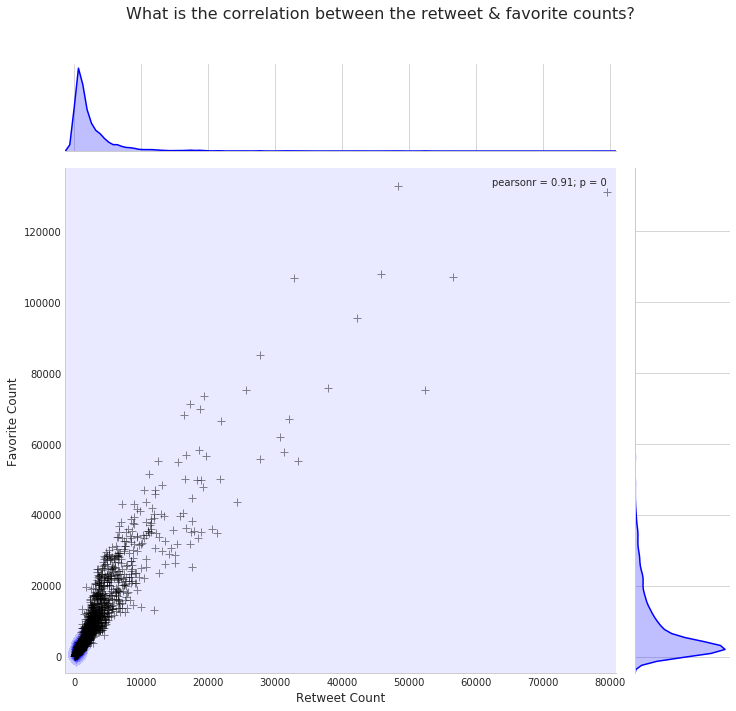

In [68]:
# A plot comparing the favorite & retweet counts
sns.set_style('whitegrid')
rf_tweet = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=df_clean_master, 
                  color="blue",
                  kind="kde", 
                  size=10)
rf_tweet.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="+",
             alpha=0.45)
rf_tweet.set_axis_labels("Retweet Count", "Favorite Count",fontsize=12)

rf_tweet.fig.subplots_adjust(top=0.9)
plt.suptitle('What is the correlation between the retweet & favorite counts?',
                 fontsize=16)

## References:


>* http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.read_json.html


>* https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe


